### Problem Statement:
- To train a machine learning model to predict whether a bank customer will churn(leave the bank) or not based on various customer attributes and banking behaviour. the goal is to create a model that can accurately identify customers who are likely to churn, enabling proactive retention startegies.

In [1]:
### Importing all the essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading the dataset**

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

**Understanging dataset and Features**

In [3]:
## Gives top 5 records
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
## Gives shape of dataset
df.shape

(10000, 14)

- There are 10000 rows and 14 columns in dataset.

In [5]:
## Gives datatypes of dataset
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
## Gives all information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Feature Information:


In [7]:
# Dropping columns which are not necessary for prediction
df.drop(columns=['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [8]:
## Gives null value info.
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

- There are no null values in dataset.

In [9]:
df.describe() ##Gives statstical summary of data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Exploaratory DataAnalysis(EDA)

In [10]:
df['Exited'].value_counts(normalize=True)*100

0    79.63
1    20.37
Name: Exited, dtype: float64

- Observation: There is an imbalance in target variable (Exited) as only there are about 20% Customers who churn.

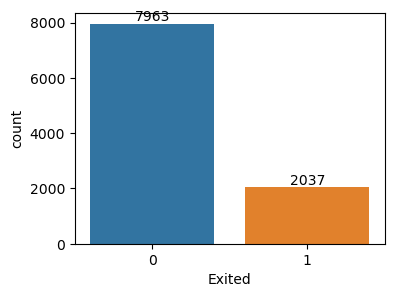

In [11]:
plt.figure(figsize = (4,3))
ax = sns.countplot(x = df['Exited'], data =df)
for label in ax.containers:
    ax.bar_label(label);

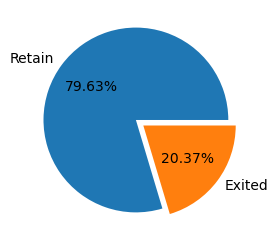

In [12]:
plt.figure(figsize = (4,3))
target_val = df['Exited'].value_counts().values
target_name = df['Exited'].value_counts().index
plt.pie(x=target_val, labels=['Retain','Exited'], autopct = '%1.2f%%', explode=[0.1, 0])
plt.show()

Skewness: -0.07160660820092675
Mode: 0    850
Name: CreditScore, dtype: int64


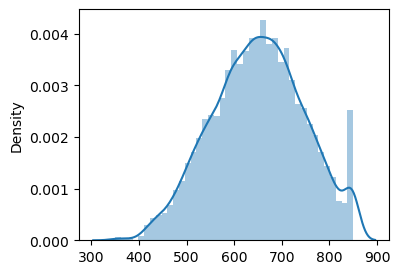

In [13]:
print('Skewness:',df['CreditScore'].skew())
print('Mode:',df['CreditScore'].mode())

plt.figure(figsize = (4,3))
sns.distplot(x = df['CreditScore']);

- Most of the customers CreditScore is normally distributrd with a mode at 850.

In [14]:
pd.crosstab(df['Gender'], df['Exited'], normalize=True)

Exited,0,1
Gender,,
Female,0.3404,0.1139
Male,0.4559,0.0898


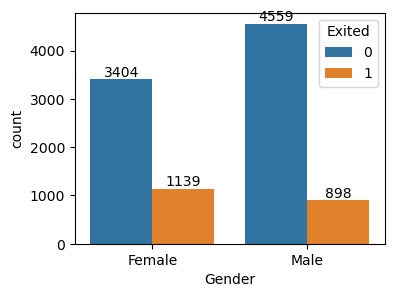

In [15]:
plt.figure(figsize = (4,3))
ax = sns.countplot(x = df['Gender'],hue='Exited',data =df)
for label in ax.containers:
    ax.bar_label(label);

- we can see that, Female Customers likely to churn the bank more as compare to Male customers.

Skewness: 1.0113202630234552


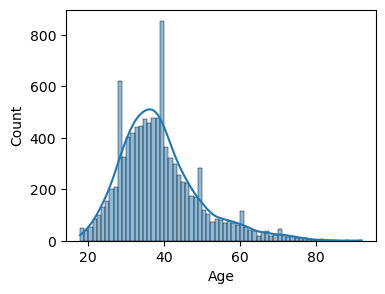

In [16]:
print('Skewness:',df['Age'].skew())

plt.figure(figsize = (4,3))
sns.histplot(x = df['Age'], kde=True);

- We can see that Age of Customers is following  right skewed distribution.
- Lets create the bin for Age column.

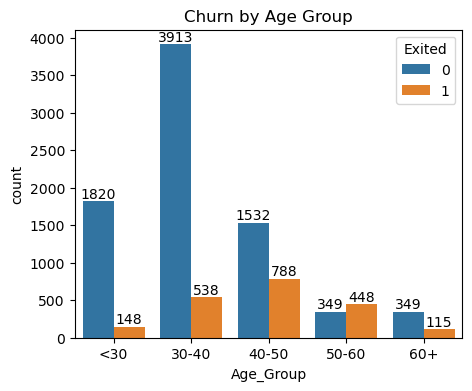

In [17]:
# Churn by age group
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, np.inf], labels=['<30', '30-40', '40-50', '50-60', '60+'])

plt.figure(figsize=(5, 4))
ax = sns.countplot(x='Age_Group', hue='Exited', data=df)
plt.title('Churn by Age Group')
for label in ax.containers:
    ax.bar_label(label);

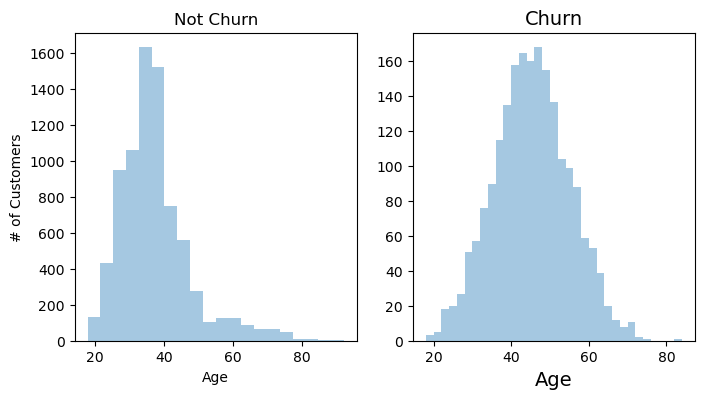

In [18]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ax = sns.distplot(df[df['Exited'] == 0]['Age'],
                   hist=True, kde=False,
                   bins=20)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Age')
ax.set_title('Not Churn')

plt.subplot(1,2,2)
ax = sns.distplot(df[df['Exited'] == 1]['Age'],
                   hist=True, kde=False)
ax.set_xlabel('Age',size = 14)
ax.set_title('Churn',size = 14);

In [19]:
pd.crosstab(df['Gender'], df['Age_Group'], normalize=True)*100

Age_Group,<30,30-40,40-50,50-60,60+
Gender,,,,,
Female,8.80,19.59,11.0,3.91,2.13
Male,10.88,24.92,12.2,4.06,2.51


- we can see that, the customers with Age group (40-50) followed by (30-40) are more likely to churn the Bank.
- Number of counts are more for male customers as compare to female customers in all age group.
- We can see that number of customers are more in age group of (30-40) and less in age group of 60+.

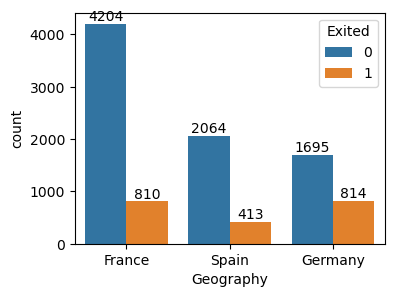

In [20]:
plt.figure(figsize = (4,3))
ax = sns.countplot(x = df['Geography'],hue='Exited',data =df)
for label in ax.containers:
    ax.bar_label(label);

- Obervation: We can see that Germany has more exit followed by France.

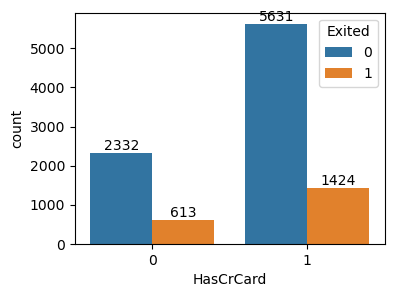

In [21]:
plt.figure(figsize = (4,3))
ax = sns.countplot(x = df['HasCrCard'],hue='Exited',data =df)
for label in ax.containers:
    ax.bar_label(label);

- Customers with CreditCard have more  exit as comapre to customers with no credit card.

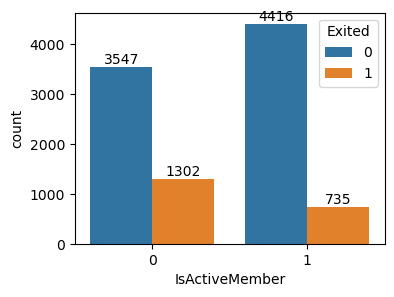

In [22]:
plt.figure(figsize = (4,3))
ax = sns.countplot(x = df['IsActiveMember'],hue='Exited',data =df)
for label in ax.containers:
    ax.bar_label(label);

- Observation: Active customers are less likely to exit as compare to Non-Active member.

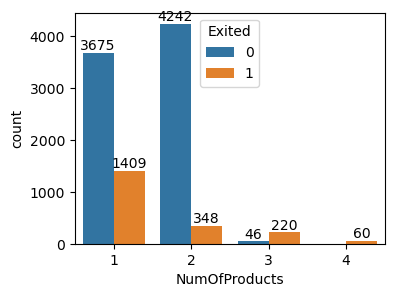

In [23]:
plt.figure(figsize = (4,3))
ax = sns.countplot(x = df['NumOfProducts'],hue='Exited',data =df)
for label in ax.containers:
    ax.bar_label(label);

Observation: We can see that, the customers who have purchased one products are exiting the Bank more.

In [24]:
df['Balance'].value_counts()

0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: Balance, Length: 6382, dtype: int64

- We can see that there are more customers with zero balance, so lets analyze it further.

In [25]:
df['Balance'].where(df['Balance']== 0, 1).value_counts()

1.0    6383
0.0    3617
Name: Balance, dtype: int64

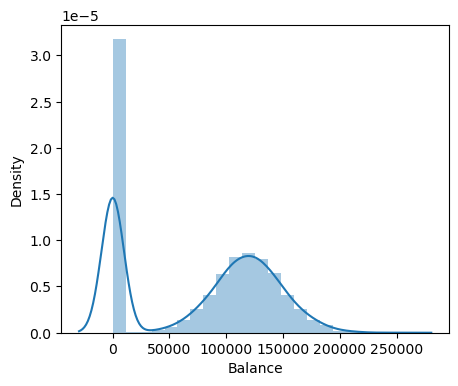

In [26]:
plt.figure(figsize=(5,4))
sns.distplot(df['Balance']);

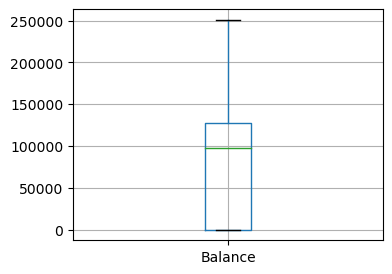

In [27]:
plt.figure(figsize=(4,3))
figure = df.boxplot(column = 'Balance')

- Observation: We can see a mode at 0 balance and customers Balance is following normal distribuation within range of 50k to 250k.

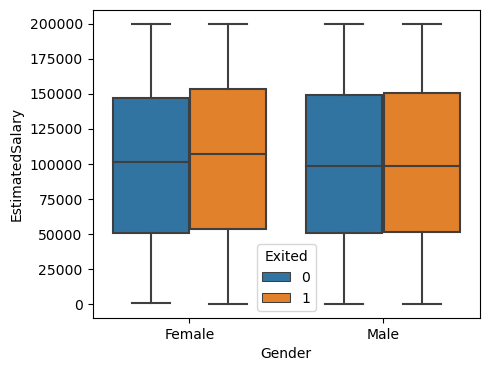

In [28]:
plt.figure(figsize=(5,4))
sns.boxplot(y='EstimatedSalary',x='Gender', hue='Exited', data=df);

**Observations:** We can see that, there is no significant diffrence in male customers who churn while there is a small difference in estimated saalry of female customers who churn.

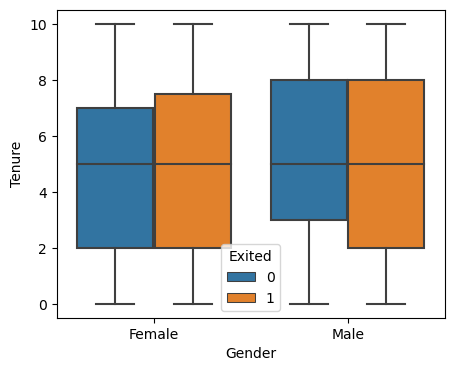

In [29]:
plt.figure(figsize=(5,4))
sns.boxplot(y='Tenure',x='Gender', hue='Exited', data=df);

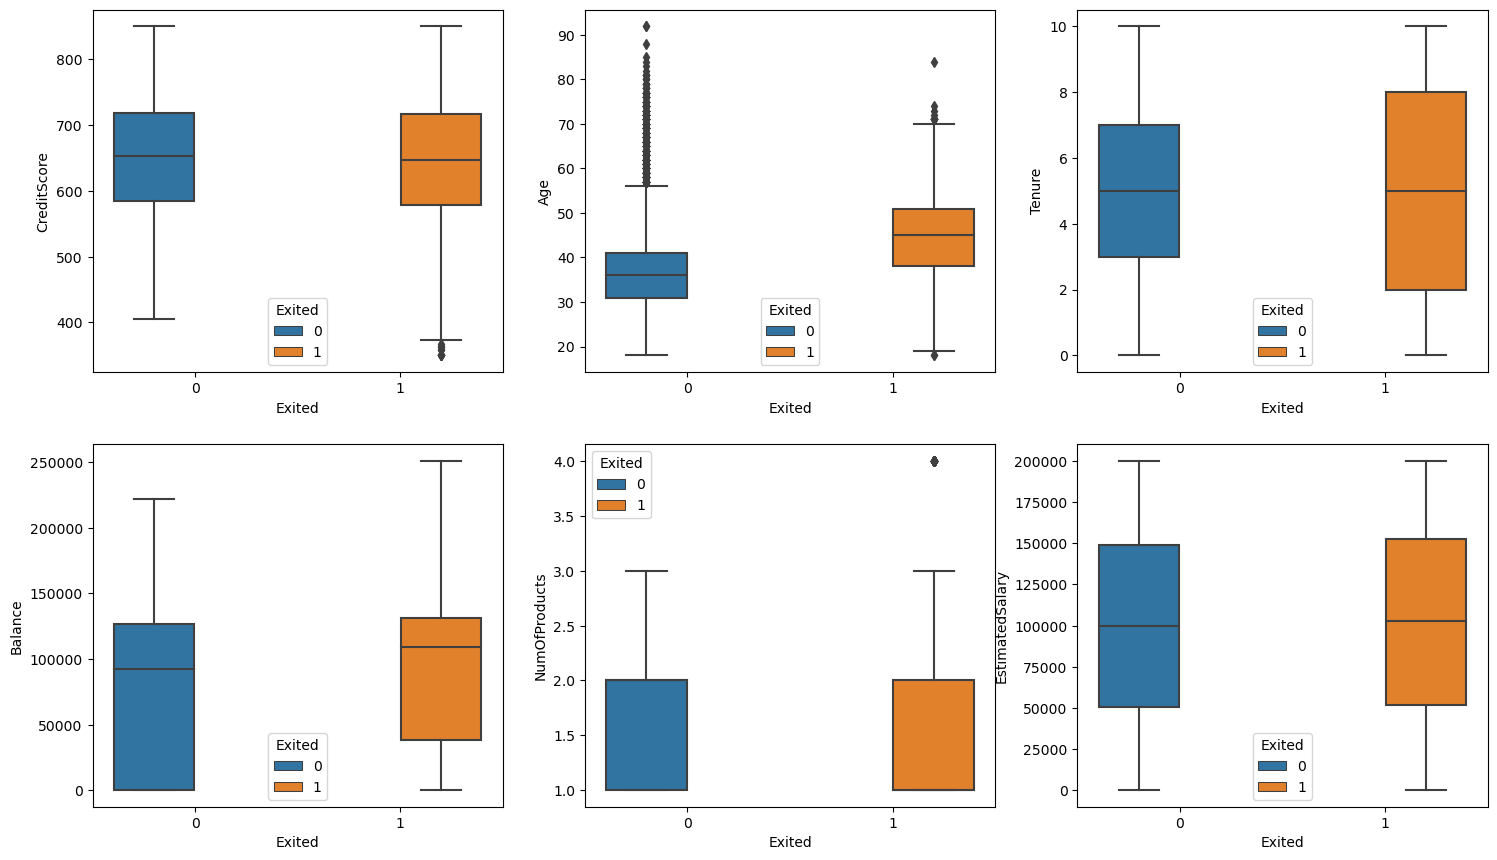

In [30]:
### Bi-variate Analysis of Features.

plt.figure(figsize=(18,16))

plt.subplot(3,3,1)
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df)

plt.subplot(3,3,2)
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df)

plt.subplot(3,3,3)
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df)

plt.subplot(3,3,4)
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df)

plt.subplot(3,3,5)
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df)

plt.subplot(3,3,6)
sns.boxplot(y='EstimatedSalary',x = 'Exited',hue = 'Exited', data = df);

**Observations:**
- There is no significant difference in Credit score,estimated salary and number of products of the customers who exist and who din't exist the bank.
- Customers with tenure period with bank either too less or too more , both are exiting the bank.
- We can see that the cutomers with more Balance are churning the company.
- The customers with older age are exiting more than the younger age customers, so the bank need to focus more on older customers.

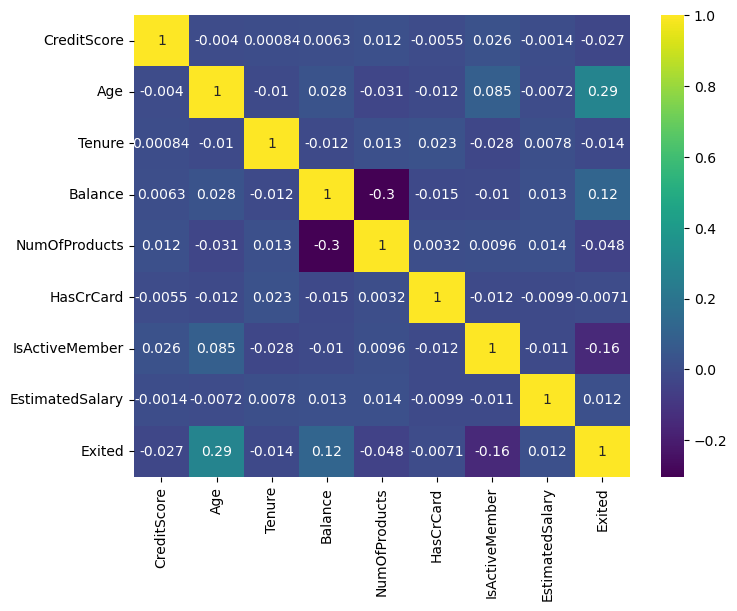

In [31]:
## Correlation Matrix

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap = 'viridis');

- Age and Balance are positively correlated with target variable.

In [32]:
df.drop('Age_Group', axis=1, inplace=True)

**X & y**

In [33]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [34]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [35]:
print(X.shape, y.shape)

(10000, 11) (10000,)


**Feature Importance**

In [36]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X, y)
mutual_info

array([0.        , 0.07122384, 0.        , 0.00975747, 0.07382952,
       0.00666679, 0.01347044, 0.00270393, 0.01842194, 0.00471522,
       0.00743007])

In [37]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

NumOfProducts        0.073830
Age                  0.071224
Geography_Germany    0.018422
IsActiveMember       0.013470
Balance              0.009757
Gender_Male          0.007430
HasCrCard            0.006667
Geography_Spain      0.004715
EstimatedSalary      0.002704
CreditScore          0.000000
Tenure               0.000000
dtype: float64

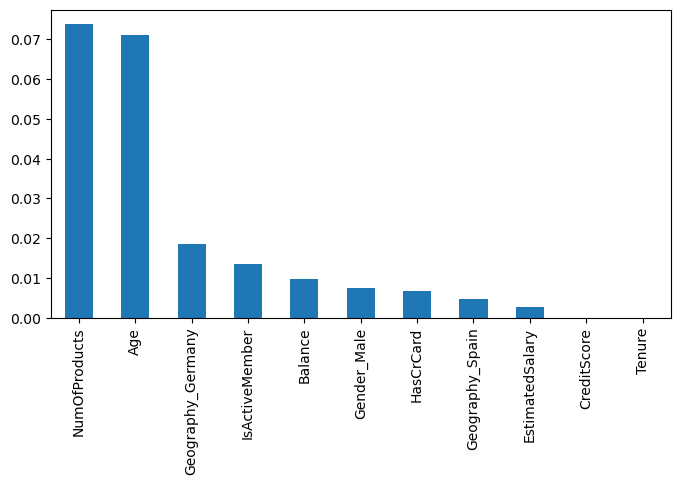

In [38]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(8, 4))
plt.show()

**Observations:** We can see that NumofProducts and Age are more important in predicting the outcome whereas Gender has very least importance.

In [39]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

- The dataset is imbalenced, so will do oversampling of minority class by SMOTE technique.

In [40]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_new, y_new = smote.fit_resample(X,y)

print('dataset shape before smote:')
print(y.value_counts())
print('-------------------------------------')
print('dataset shape after smote:')
print(y_new.value_counts())

dataset shape before smote:
0    7963
1    2037
Name: Exited, dtype: int64
-------------------------------------
dataset shape after smote:
1    7963
0    7963
Name: Exited, dtype: int64


**Train-Test Split**

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=0)

In [43]:
print(X_train.shape, X_test.shape)

(12740, 11) (3186, 11)


### Modelling & Evaluation using LogisticRegression Regressor

In [53]:
from sklearn.linear_model import LogisticRegression 
log_model = LogisticRegression()
log_model.fit(X_train,y_train) 

### Prediction
ypred_train = log_model.predict(X_train) #Prediction on Train_data
ypred_test = log_model.predict(X_test)  #Prediction on Test_data

## Evaluation
## Train_Test Accuracy
from sklearn.metrics import accuracy_score
print('Train Accuracy:', accuracy_score(y_train,ypred_train))
print('Test Accuracy:', accuracy_score(y_test,ypred_test))

## Cross-validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_model,X,y,cv=5)
print('Cross-Validation Score:',scores.mean())

Train Accuracy: 0.6637362637362637
Test Accuracy: 0.6757689893283113
Cross-Validation Score: 0.7907


In [54]:
### Confusion Matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, ypred_test)
cf_matrix

array([[1037,  553],
       [ 480, 1116]], dtype=int64)

In [55]:
### Classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67      1590
           1       0.67      0.70      0.68      1596

    accuracy                           0.68      3186
   macro avg       0.68      0.68      0.68      3186
weighted avg       0.68      0.68      0.68      3186



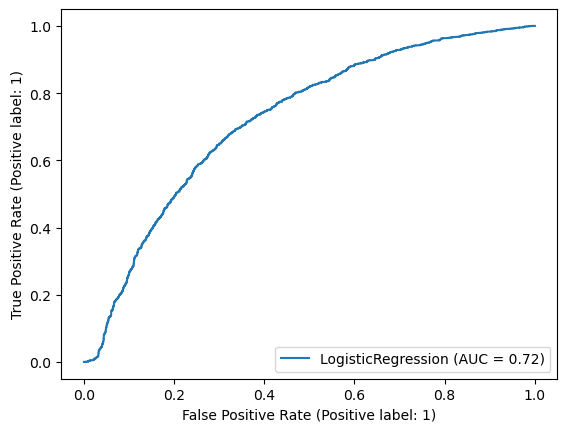

In [56]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_model,X_test,y_test)
plt.show()

### Modelling & Evaluation using DecisionTree Classifier

In [57]:
#Decision Tree Classifier(with default parameter)
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train,y_train)

#Prediction
ypred_train = dt_model.predict(X_train)
ypred_test = dt_model.predict(X_test)

#Evaluation
from sklearn.metrics import accuracy_score
print('Train accuracy:', accuracy_score(y_train,ypred_train))
print("Test Accuracy:", accuracy_score(y_test, ypred_test))

#CVS
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_model,X,y,cv=5)
print("Cross Validation Score:",scores.mean())

Train accuracy: 1.0
Test Accuracy: 0.7915881983678594
Cross Validation Score: 0.794


**Features importance given by DecisionTree Model**

In [58]:
dt_model.feature_importances_

array([0.11571253, 0.24189559, 0.05988664, 0.13288994, 0.09158667,
       0.01695225, 0.11605073, 0.13477514, 0.01407103, 0.02097907,
       0.05520041])

In [59]:
pd.DataFrame(index= X.columns, data=dt_model.feature_importances_, columns=['Feature Importance'])

,Feature Importance
CreditScore,0.115713
Age,0.241896
Tenure,0.059887
Balance,0.132890
NumOfProducts,0.091587
HasCrCard,0.016952
IsActiveMember,0.116051
EstimatedSalary,0.134775
Geography_Germany,0.014071
Geography_Spain,0.020979


**HyperParameter Tunning** 

In [61]:
from sklearn.model_selection import GridSearchCV

#Model
estimator = DecisionTreeClassifier(random_state=0)

#parameters which you want to tune and indentify the best
param_grid = {'criterion':['gini','entropy'],
             'max_depth':[1,2,3,4,5,7,10]}

grid = GridSearchCV(estimator,param_grid, cv=5, scoring='accuracy')
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'gini', 'max_depth': 7}

### Final Decision Tree Model with best hyper parameter

In [63]:
#Modelling
dt_bhp =  DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=0)
dt_bhp.fit(X_train,y_train)

#prediction
ypred_train = dt_bhp.predict(X_train)
ypred_test = dt_bhp.predict(X_test)

#Evaluation
print("Train Accuracy:", accuracy_score(y_train,ypred_train))
print("Test Accuracy:", accuracy_score(y_test, ypred_test))

##CVS
scores = cross_val_score(dt_bhp,X,y,cv=5)
print("Cross Validation Score:",scores.mean())

Train Accuracy: 0.8290423861852433
Test Accuracy: 0.8170119271814187
Cross Validation Score: 0.8543999999999998


In [64]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, ypred_test)
cf_matrix

array([[1304,  286],
       [ 297, 1299]], dtype=int64)

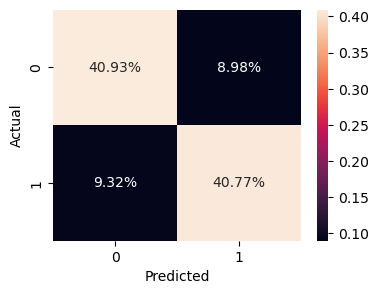

In [65]:
plt.figure(figsize=(4,3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1590
           1       0.82      0.81      0.82      1596

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.82      0.82      0.82      3186



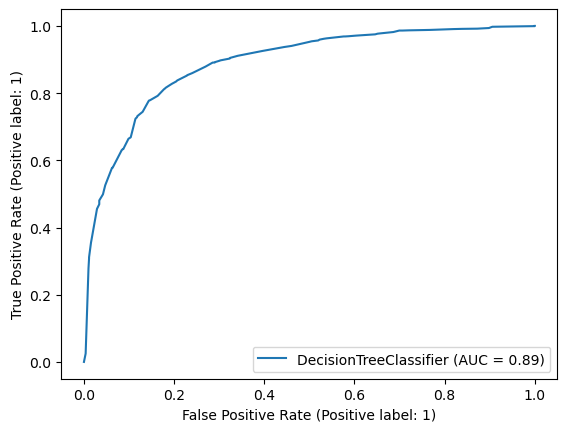

In [67]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dt_bhp,X_test,y_test)
plt.show()

### Modelling & Evaluation using RandomForest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
model.fit(X_train,y_train)

#Predication
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

#Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(y_train,ypred_train))
print("Test Accuracy:", accuracy_score(y_test,ypred_test))

#CVS
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X,y,cv=5)
print("Cross Validation Score:", scores.mean())

Train Accuracy: 1.0
Test Accuracy: 0.8549905838041432
Cross Validation Score: 0.8622000000000002


**Importance of each features given by this model**

In [71]:
model.feature_importances_

array([0.11545552, 0.22433187, 0.07191861, 0.12215892, 0.110698  ,
       0.02023098, 0.10424988, 0.1231213 , 0.01456024, 0.02811023,
       0.06516444])

In [72]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance'])

,Feature Importance
CreditScore,0.115456
Age,0.224332
Tenure,0.071919
Balance,0.122159
NumOfProducts,0.110698
HasCrCard,0.020231
IsActiveMember,0.104250
EstimatedSalary,0.123121
Geography_Germany,0.014560
Geography_Spain,0.028110


**HyperParameter Tunning**

In [86]:
#Model
estimator = RandomForestClassifier(random_state=0)

#parameters which you want to tune and indentify the best
param_grid = {'n_estimators':[5,10,15,20,30,50,70,110], 'criterion':['gini','entropy'], 'max_depth':range(2,4,1), 'max_features':['auto','log2']}

grid = GridSearchCV(estimator,param_grid, cv=5, scoring='accuracy')
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'n_estimators': 110}

### Random Forest Model with best Hyperparameter

In [87]:
#Modelling
model_best = RandomForestClassifier(n_estimators=110,random_state=0, criterion = 'gini', max_depth=3, max_features='auto')
model_best.fit(X_train,y_train)

#Prediction
ypred_train = model_best.predict(X_train)
ypred_test = model_best.predict(X_test)

#Evaluation
print("Train accuracy:", accuracy_score(y_train,ypred_train))
print("Test Accuracy:", accuracy_score(y_test,ypred_test))
scores = cross_val_score(model_best, X,y,cv=5)
print("Cross Validation Score:", scores.mean())

Train accuracy: 0.8077708006279435
Test Accuracy: 0.8097928436911488
Cross Validation Score: 0.8212999999999999


In [88]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, ypred_test)
cf_matrix

array([[1316,  274],
       [ 332, 1264]], dtype=int64)

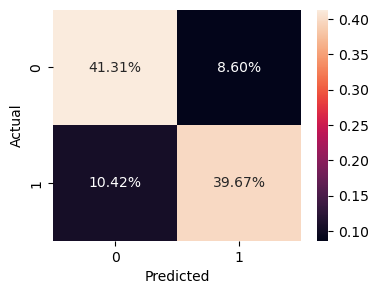

In [89]:
plt.figure(figsize=(4,3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1590
           1       0.82      0.79      0.81      1596

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186



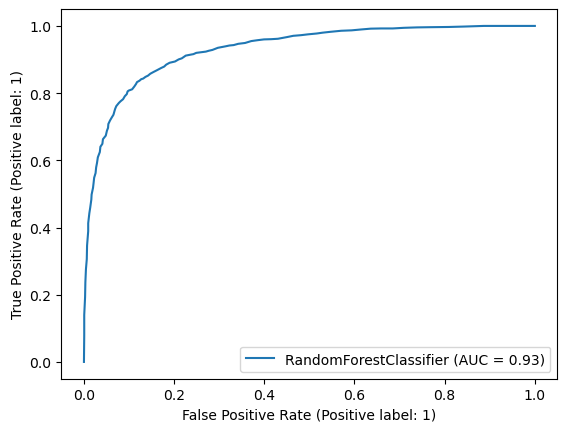

In [91]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,X_test,y_test)
plt.show()

In [ ]:
##Creating a function to calculate best model for this problem'
models = {'random_forest':{'model':RandomForestClassifier(random_state=0), 'parameters':{'n_estimators':[5,10,15,20,30,50],
                                   'criterion':['gini','entropy'], 'max_depth':range(2,4,1), 'max_features':['auto','log2']}},
              
              'xg_boost':{'model':XGBClassifier(objective='binary:logistic'), 'parameters':{'n_estimators':[10,50,100,200],
                            'max_depth':[3,5,10,20], 'gamma':[0,0.3,0.5,1]}}}
    

scores = []
for model_name, model_params in models.items():
    gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=5, return_train_score=False)
    gs.fit(X_new, y_new)
    scores.append({'model': model_name,'best_parameters':gs.best_params_, 'score':gs.best_score_})

### Modelling & Evaluation using XGBooset  Classifier

In [92]:
#import
from xgboost import XGBClassifier

#Modelling
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)

#Prediction
ypred_train = xgb_model.predict(X_train)
ypred_test = xgb_model.predict(X_test)

#Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(y_train, ypred_train))
print("Train Accuracy:", accuracy_score(y_test, ypred_test))

#CVS
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_model, X,y,cv=5)
print("Cross Validation Score:", scores.mean())

Train Accuracy: 0.9506279434850864
Train Accuracy: 0.8568738229755178
Cross Validation Score: 0.8547


**HyperParameter tunning**

In [101]:
#estimator/model
estimator = XGBClassifier(objective='binary:logistic')

#Parameters grid
param_grid = {'n_estimators':[10,20,40,50],
             'max_depth':[3,4,5],
             'gamma':[0,0.15,0.3,0.5,1]}

#grid Search
grid = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train,y_train)
grid.best_params_


{'gamma': 0.3, 'max_depth': 5, 'n_estimators': 50}

**Feature Importance given by this model**

In [102]:
grid.best_estimator_.feature_importances_

array([0.01557322, 0.11844395, 0.02273946, 0.03086236, 0.11531733,
       0.06132087, 0.36093438, 0.01704608, 0.02896933, 0.08333424,
       0.14545883], dtype=float32)

In [103]:
features = pd.DataFrame(data = grid.best_estimator_.feature_importances_,
                    index= X.columns,
                    columns = ['Importance'])
features

,Importance
CreditScore,0.015573
Age,0.118444
Tenure,0.022739
Balance,0.030862
NumOfProducts,0.115317
HasCrCard,0.061321
IsActiveMember,0.360934
EstimatedSalary,0.017046
Geography_Germany,0.028969
Geography_Spain,0.083334


### XGBoost with best hyperparameter

In [104]:
#modelling
xgb_best = XGBClassifier(gamma =0.3, max_depth=5, n_estimators= 50)
xgb_best.fit(X_train,y_train)

#Prediction
ypred_train = xgb_best.predict(X_train)
ypred_test = xgb_best.predict(X_test)

#Evaluation
print("Train Accuracy:", accuracy_score(y_train,ypred_train))
print("Test Accuracy:", accuracy_score(y_test,ypred_test))

scores = cross_val_score(xgb_best,X,y,cv=5)
print("Cross Validation Score:", scores.mean())

Train Accuracy: 0.8883830455259026
Test Accuracy: 0.8430634023854363
Cross Validation Score: 0.8615999999999999


In [105]:
from sklearn.metrics import confusion_matrix
cf1_matrix = confusion_matrix(y_test, ypred_test)
cf1_matrix

array([[1340,  250],
       [ 250, 1346]], dtype=int64)

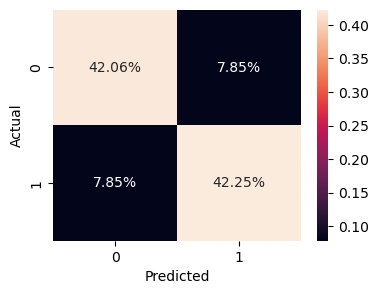

In [106]:
plt.figure(figsize=(4,3))
sns.heatmap(cf1_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1590
           1       0.84      0.84      0.84      1596

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



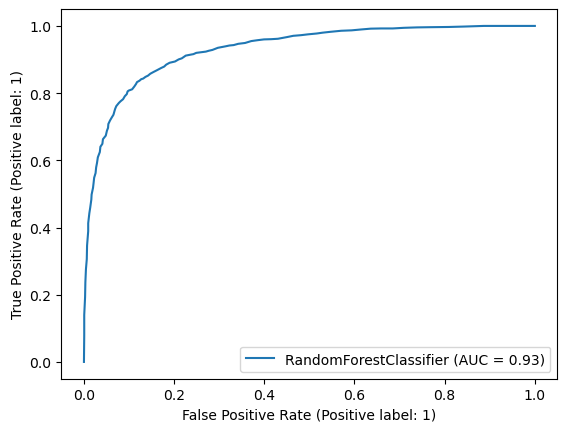

In [108]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,X_test,y_test)
plt.show()

In [109]:
import pickle
#create a file, where we want to save the model
file = open('bankchurn_xgb.pkl','wb')

#Dump the inforamtion to the file we created
pickle.dump(model, file)